**Submission Dicoding Machine Learning Pemula**

**Rock Paper Scissors**

In [1]:
# import library
import numpy as np
import scipy as sp
import cv2
import os
import itertools
import zipfile
import shutil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# import library Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [3]:
# zip file download rockpaperscissors.zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-11 06:17:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.48MB/s    in 63s     

2021-04-11 06:18:42 (4.93 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# unzipping/extract data .zip
file_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

print(os.listdir('/tmp/rockpaperscissors'))

['scissors', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images', 'paper']


In [5]:
# make directory name for data training and validation (test) 
dir = '/tmp/rockpaperscissors/'
train_directory = os.path.join(dir, 'train')
validation_directory = os.path.join(dir, 'val')

# check if already exists
if not os.path.exists(train_directory) :
  os.mkdir(train_directory)

if not os.path.exists(validation_directory) :
  os.mkdir(validation_directory)

In [6]:
# check a lot of data for paper, rock and scissors
rock_dir = os.path.join(dir,'rock')
paper_dir = os.path.join(dir, 'paper')
scissors_dir = os.path.join(dir, 'scissors')
print(len(os.listdir('/tmp/rockpaperscissors/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/rock'))) 
print(len(os.listdir('/tmp/rockpaperscissors/scissors')))

712
726
750


In [7]:
# split data on folders rasio 60:40
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [8]:
# spread dir data for train and test (validation)
train_paper = os.path.join(train_directory, 'paper')
train_rock = os.path.join(train_directory, 'rock')
train_scissors = os.path.join(train_directory, 'scissors')

val_rock = os.path.join(validation_directory, 'rock')
val_paper = os.path.join(validation_directory, 'paper')
val_scissors = os.path.join(validation_directory, 'scissors')

In [9]:
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [10]:
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [11]:
print('train rock = ',len(os.listdir('/tmp/rockpaperscissors/train/rock')))
print('train scissors = ',len(os.listdir('/tmp/rockpaperscissors/train/scissors')))
print('train paper = ',len(os.listdir('/tmp/rockpaperscissors/train/paper')))

print('val paper = ',len(os.listdir('/tmp/rockpaperscissors/val/paper')))
print('val rock = ',len(os.listdir('/tmp/rockpaperscissors/val/rock')))
print('val scissors = ',len(os.listdir('/tmp/rockpaperscissors/val/scissors')))

train rock =  435
train scissors =  450
train paper =  427
val paper =  285
val rock =  291
val scissors =  300


In [12]:
# make imagedatagenerator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.4,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.4,
    fill_mode = 'nearest')


In [13]:
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size =(100,100),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_directory,
    target_size = (100,100),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [14]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [15]:
validation_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [16]:
# make model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(100, 100, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       3

In [18]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])


In [19]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 16s - loss: 1.7219 - accuracy: 0.3150 - val_loss: 1.0973 - val_accuracy: 0.3063
Epoch 2/20
25/25 - 14s - loss: 1.0976 - accuracy: 0.3638 - val_loss: 1.0747 - val_accuracy: 0.3125
Epoch 3/20
25/25 - 14s - loss: 1.0081 - accuracy: 0.4913 - val_loss: 0.8925 - val_accuracy: 0.6938
Epoch 4/20
25/25 - 14s - loss: 0.6654 - accuracy: 0.7337 - val_loss: 0.6443 - val_accuracy: 0.8438
Epoch 5/20
25/25 - 14s - loss: 0.4261 - accuracy: 0.8313 - val_loss: 0.4736 - val_accuracy: 0.8125
Epoch 6/20
25/25 - 14s - loss: 0.3692 - accuracy: 0.8637 - val_loss: 0.3493 - val_accuracy: 0.8875
Epoch 7/20
25/25 - 14s - loss: 0.2239 - accuracy: 0.9225 - val_loss: 0.2209 - val_accuracy: 0.9187
Epoch 8/20
25/25 - 14s - loss: 0.2397 - accuracy: 0.9175 - val_loss: 0.3036 - val_accuracy: 0.9375
Epoch 9/20
25/25 - 14s - loss: 0.2016 - accuracy: 0.9300 - val_loss: 0.2030 - val_accuracy: 0.9438
Epoch 10/20
25/25 - 14s - loss: 0.1437 - accuracy: 0.9488 - val_loss: 0.1947 - val_accuracy: 0.9563
Epoch 11/

In [20]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

28/28 [==============================] - 7s 231ms/step - loss: 0.1422 - accuracy: 0.9589
Accuracy (train):  0.9657012224197388
Accuracy: (test) 0.9589040875434875


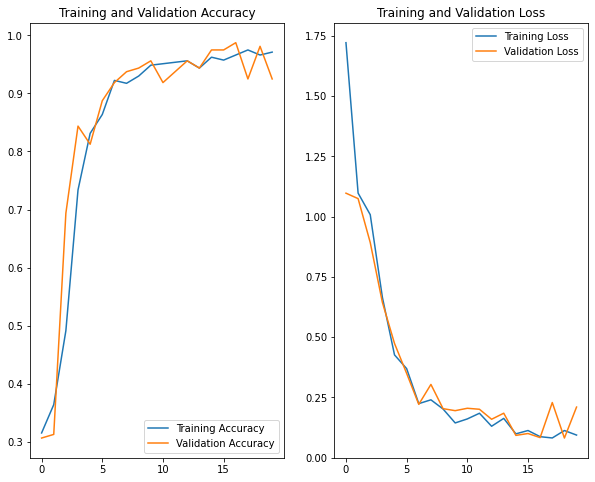

In [21]:
# visualitation (Plot accuracy & loss model)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving hand-2704013_1280.webp to hand-2704013_1280.webp
Paper


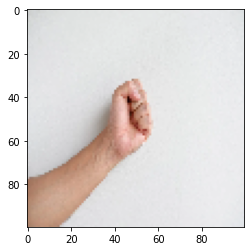

In [22]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  if classes[0,0] == 1.0:
    print('Paper')
  elif classes[0,1] == 1.0:
    print('Rock')
  else:
    print('Scissors')